# __Credit Card Fraud Detection - Intro to Data Science Project__
---


## About Our Group 

- BS20DSY031 - Tuan Nguyen
- BS20DSY022 - Tam Tran
- BS20DSY026 - Joshua Benzon
- BS20DSY041 - Hai Nguyen

## INTRODUCTION

Assume that you are employed to help a credit card company to detect potential fraud cases so that the customers are ensured that they won’t be charged for the items they did not purchase. 

You are given a dataset containing the transactions between people, the information that they are fraud or not, and you are asked to differentiate between them. This is the case we are going to deal with. Our ultimate intent is to tackle this situation by building classification models to classify and distinguish fraud transactions.

**Why Classification?** 
Classification is the process of predicting discrete variables (binary, Yes/no, etc.). 
Given the case, it will be more optimistic to deploy a classification model rather than any others.

**Where this dataset come from?**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. The datasets contain transactions made by credit cards in September 2013 by European cardholders.

Data field:
- The dataset contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. V1, V2, …, V28: the principal components obtained with PCA (Principal Component Analysis). 

**The only features which have not been transformed with PCA are 'Time' and 'Amount'.*

- Time: the seconds elapsed between each transaction and the first transaction in the dataset.

- Amount: the transaction Amount

- Class (Target Column): it takes value 1 in case of fraud and 0 otherwise




## DATA IMPORTING 
### __IMPORT REQUIRED PACKAGES__

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler as Scaler # Data Normalization
from sklearn.linear_model import LogisticRegression # Logistic Regression Algorithm
from sklearn.tree import DecisionTreeClassifier # Decision Tree Algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN Algorithm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Linear Discriminant Analysis Algorithm
from sklearn.naive_bayes import GaussianNB # Naive Bayes Algorithm
from sklearn.svm import SVC # Support Vector Machine Algorithm

from sklearn.model_selection import train_test_split # Data Split
from sklearn.model_selection import cross_val_score # Cross Validation
from sklearn.model_selection import StratifiedKFold # K-Fold Cross Validation
from sklearn.metrics import classification_report # Evaluation Metric 
from sklearn.metrics import confusion_matrix # Evaluation Metric
from sklearn.metrics import accuracy_score # Evaluation Metric
from sklearn.metrics import f1_score # Evaluation Metric
from sklearn.metrics import recall_score #Evaluation Metric
from sklearn.metrics import plot_confusion_matrix #Draw the metric 

### __IMPORT THE DATASET__

In [2]:
credit_df = pd.read_csv('creditcard.csv')

In [3]:
#Head of the dataframe
credit_df.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
print('This DataFrame has {} rows and {} columns.'.format(credit_df.shape[0], credit_df.shape[1]))


This DataFrame has 284807 rows and 31 columns.


## DATA PROCESSING AND EXPLORATORY DATA ANALYSIS

In [5]:
# The 'Class' column is the target/label column with two values 0 and 1 
cases = len(credit_df)
non_fraud = len(credit_df[credit_df['Class']==0])
fraud = len(credit_df[credit_df['Class']==1])
fraud_percentage = round(fraud/len(credit_df)*100,2)
print('Total number of cases: ',cases)
print('The number of Non-fraud cases: ',non_fraud)
print('The number of Fraud cases: ',fraud)
print('The percentage of Fraud case: {} %'.format(fraud_percentage))


Total number of cases:  284807
The number of Non-fraud cases:  284315
The number of Fraud cases:  492
The percentage of Fraud case: 0.17 %


We have 284,807 cases in total, but there are only 492 fraud cases which is 0.17% of the total cases. Hence, we can conclude that the dataset we are dealing with is highly imbalanced and it needs to be handled carefully when modeling and evaluating. 

All in all, our baseline model should be the majority classifier, it means that our models' accuracy need to be higher than 99.87%. It is very high so maximizing the accuracy is not an appropriate goal. We will try to maximize the recall score when evaluating the models because our final objective is to minimize the Fraud cases that are predicted to be Non-Fraud (False Negative).  


In [6]:
# General description
credit_stat = credit_df.describe().round(decimals=2)
pd.set_option("display.max_rows", None, "display.max_columns", None)
credit_stat

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [7]:
# Data correlation matrix
credit_corr = credit_df.corr().round(decimals=2)
credit_corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,0.03,-0.25,0.12,-0.07,-0.10,-0.18,0.01,-0.07,0.09,0.03,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,0.00,-0.00,-0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.10,0.13
V5,0.17,0.00,-0.00,-0.00,-0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,0.00,0.00,0.00,0.00,-0.00,0.00,1.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


Text(0.5, 1.0, 'HEATMAP OF CORRELATION')

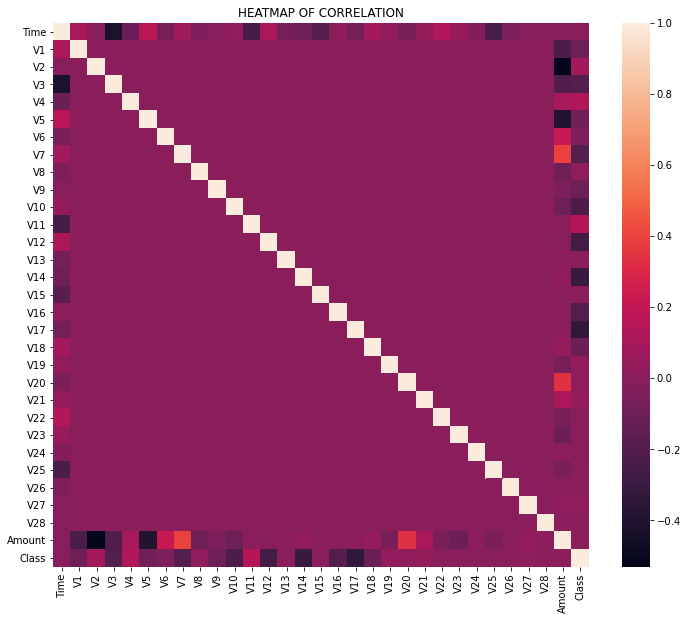

In [8]:
# Data correlation matrix using Heat Map
plt.figure(figsize=(12,10))
sns.heatmap(credit_corr, annot = False)
#sns.set(rc={'figure.figsize':(11.7,8.27)}) # Increase plot size
plt.title('HEATMAP OF CORRELATION')

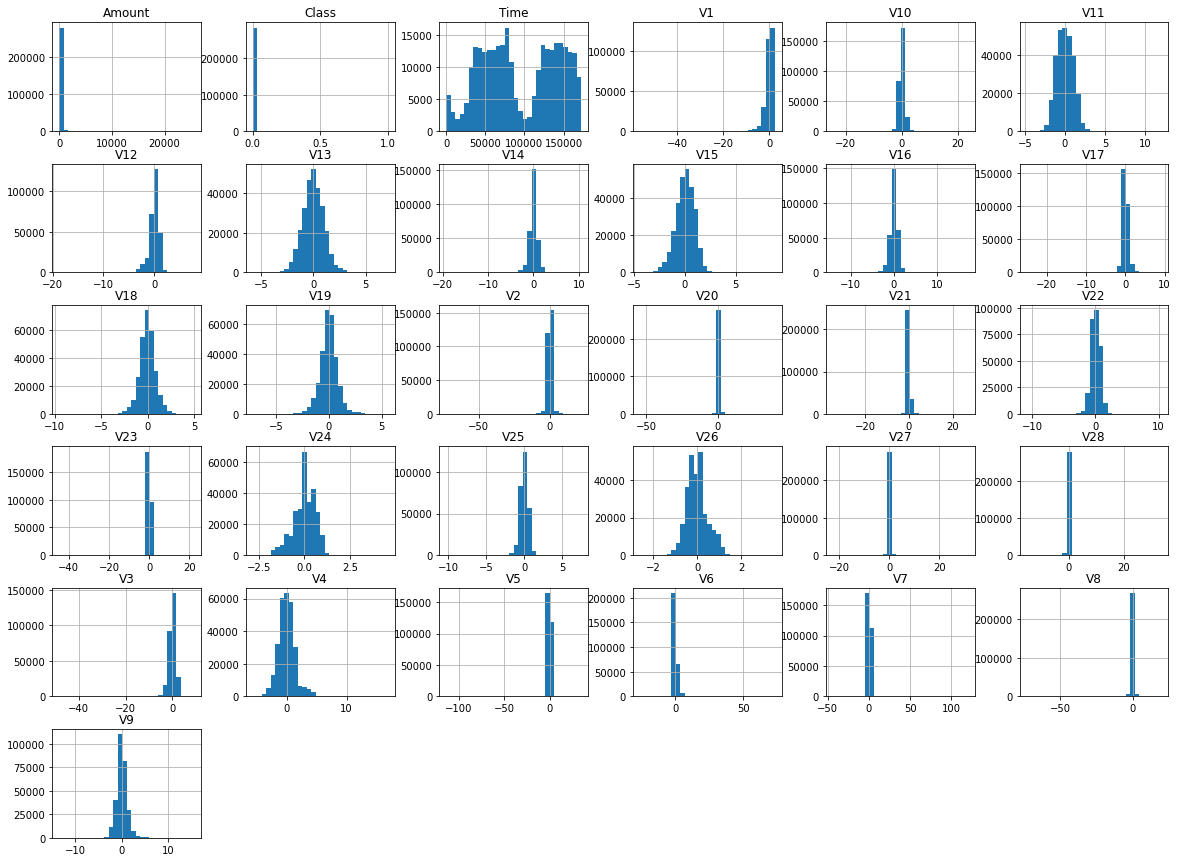

In [9]:
#Histogram of each attribute
credit_df.hist(bins=30, figsize=(20, 15))
plt.show()

As we can see from the histogram, there is no outlier in any of the columns. Therefore we will not need to deal with outliers.

## DATA CLEANING

In [10]:
# Check if the datasets has any null value

credit_df.isnull().any() # No null value


Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

## FEATURE SCALING

Let's look back to the statistical description of DataFrame.

In [11]:
credit_stat

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


We can see that _Amount_ has a remarkably higher range. This affects algorithms performance as some algorithms don't work very well if the features have a different set of values. Therefore we need a proper scaling system.


Here we choose Standardization for this dataset.

In [12]:
#Normalize data using sklearn StandardScaler
sc = Scaler()
amount = credit_df['Amount'].values
credit_df['Amount'] = sc.fit_transform(amount.reshape(-1,1))

print(credit_df['Amount'].head(10))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


## MODELING

### __Splitting data into training and validation set__

In [13]:
array = credit_df.values
X = credit_df[credit_df.columns[1:30]]
y = credit_df[credit_df.columns[30]]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
print(credit_df.columns[1:30])

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


### __Building Models__

In our fraud detection cases, we do not want to miss any fraud transactions. Hence, we will try to minimize False-Negatives (Detecting fraud transactions as non-fraud). 

In these situations, we can compromise with the low precision, but recall should be high.

LR:  0.6445731707317073 0.08603027582264376
LDA:  0.7631707317073171 0.05260764155547884
KNN:  0.7878048780487805 0.05855119228322368
CART:  0.7605487804878048 0.054218975947229124
NB:  0.8468902439024392 0.0627696147747053
SVM:  0.6692682926829268 0.07717411959508588


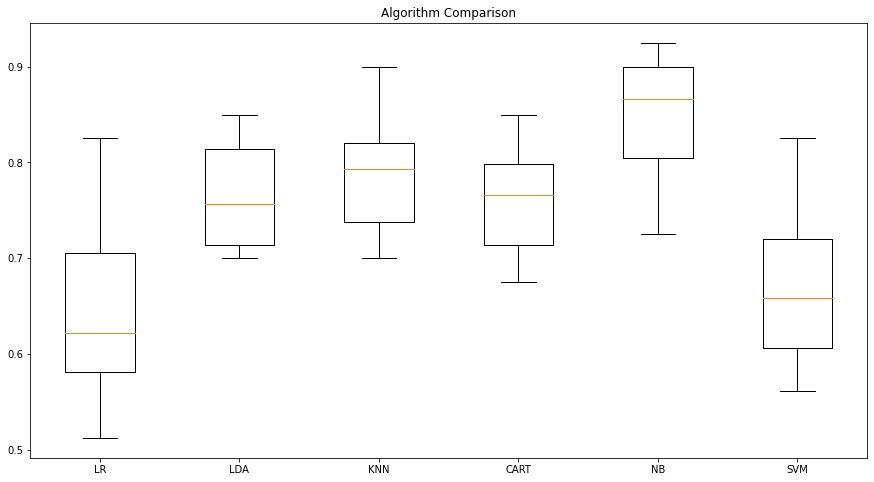

In [18]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Evaluate each model in turn using cross-validation
results, names = [], []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=3, shuffle=True)
	model_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='recall')
	results.append(model_results)
	names.append(name)
	print(name + ": ", model_results.mean(), model_results.std())

#Compare algorithms using boxplots
plt.figure(figsize=(15,8))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

It turns out ***NB*** and ***KNN*** have the highest recall scores and small standard deviations when fitting the models into training set.

## Evaluation

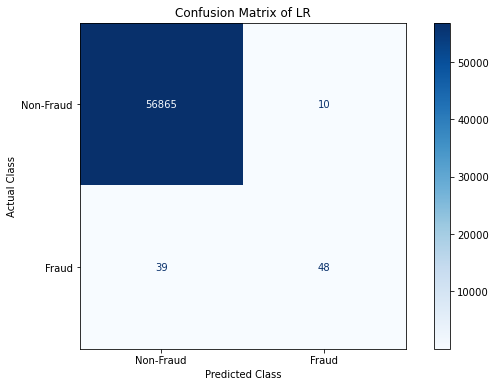

Recall score of LR: 0.5517241379310345


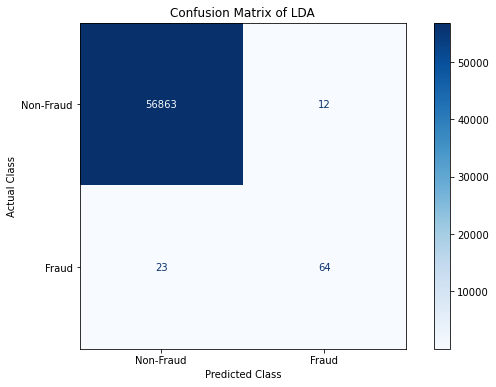

Recall score of LDA: 0.735632183908046


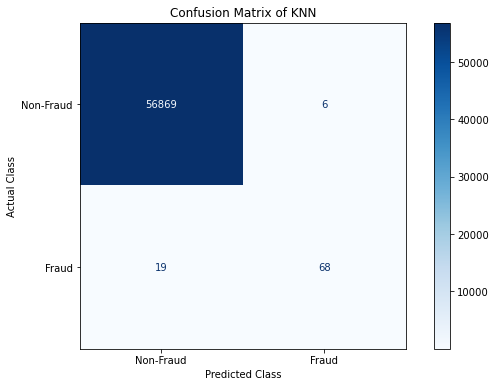

Recall score of KNN: 0.7816091954022989


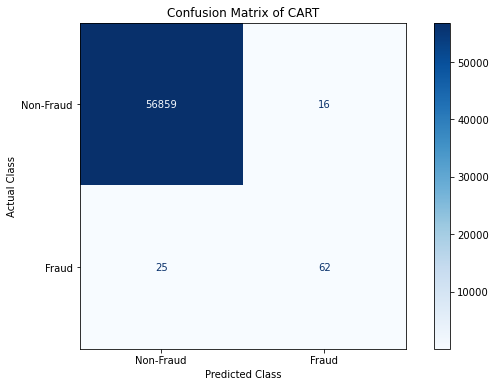

Recall score of CART: 0.7126436781609196


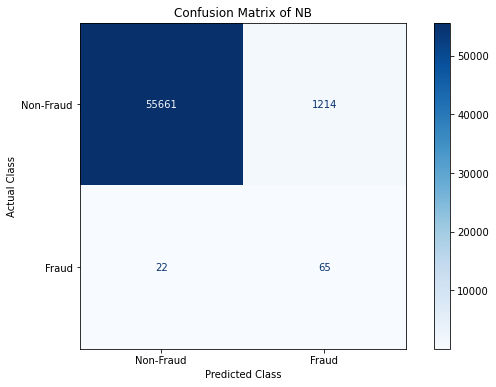

Recall score of NB: 0.7471264367816092


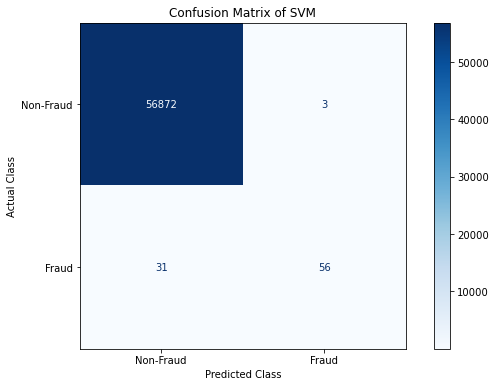

Recall score of SVM: 0.6436781609195402


In [16]:
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    class_names = ['Non-Fraud', 'Fraud'] 
    matrix = plot_confusion_matrix(model, X_validation, Y_validation, display_labels=class_names, cmap=plt.cm.Blues)
    title = 'Confusion Matrix of ' + name 
    matrix.ax_.set_title(title, color='black')
    plt.xlabel('Predicted Class', color='black')
    plt.ylabel('Actual Class', color='black')
    plt.gcf().axes[0].tick_params(color='black')
    plt.gcf().axes[1].tick_params(color='black')
    plt.gcf().set_size_inches(10,6)
    plt.show()
    
    print("Recall score of {}: {}".format(name, recall_score(Y_validation, predictions)))

As we can see, the ***NB*** and ***KNN*** are by far the best models with highest recall scores based on our test set.

## Save Model


In [20]:
#Fit the models to the entire dataset
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X,y)

lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

knn = KNeighborsClassifier()
knn.fit(X,y)

clf = DecisionTreeClassifier()
clf.fit(X,y)

nb = GaussianNB()
nb.fit(X,y)

svm = SVC(gamma='auto')
svm.fit(X,y)

import pickle 
pickle.dump(lr, open('credit_lr.pkl', 'wb'))
pickle.dump(lda, open('credit_lda.pkl', 'wb'))
pickle.dump(knn, open('credit_knn.pkl', 'wb'))
pickle.dump(clf, open('credit_clf.pkl', 'wb'))
pickle.dump(nb, open('credit_nb.pkl', 'wb'))
pickle.dump(svm, open('credit_svm.pkl', 'wb'))

## Web App

To improve the user experience, the full models and explanations can be conditionally displayed in an interactive interface. We deployed our best models on GitHub. Users can access our web app by:

- Pulling all the files from my personal Github page: https://github.com/tuanspjain/Credit_Card_Fraud_Detection. 
- Running these command lines on terminal: <br>
```pip install --upgrade streamlit
streamlit run ./app.py```

## References

- https://github.com/chriskhanhtran

- https://medium.com/codex/credit-card-fraud-detection-with-machine-learning-in-python-ac7281991d87

- Streamlit Tutorial - Data Professor

- https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/#:~:text=Linear%20Discriminant%20Analysis%20or%20Normal,separating%20two%20or%20more%20classes.

- https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

- https://www.geeksforgeeks.org/naive-bayes-classifiers/

# Thank you for your attention !